In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from scipy.spatial import distance
from sklearn import metrics

import ssl

ssl._create_default_https_context = ssl._create_stdlib_context


def find_majority_class(class_str,tuple_list):
    class_counts = {}
    for class_name in class_str:
        class_counts[class_name] = 0
    
    
    for current_tuple in tuple_list:
        for class_name in class_str:
            if class_name in current_tuple:
                class_counts[class_name] += 1
                break  
    
    majority_class = max(class_counts, key=class_counts.get)
    
    return majority_class

In [21]:
#read csv files(training, testing)
#need euclidean distance
#compute euclidean distance from new thing to all trraining points
#find the k smallest distances
#majority rules(of the k closet trinaing points, wich appears the most often)


#some code we might find useful
#import scipy.spatial.distance as ssd, ssd.euclidean()
#numpy --- np.where(condiiton, if true, if false) use for plotting
#specialized sorting --- sort all the distances and pick the k at the beiginning
#if we have a 2d list, lst.sort() sortsthe first element in every sublist, if we want something else we can specify the key



In [22]:
#1. read in training and testing data
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")


training["color"] = np.where(training["label"] == "cat","orange","firebrick")
training.head()

,name,friendliness,intelligence,label,color
0,Choux,3,8,cat,orange
1,Garfield,2,4,cat,orange
2,Lion-o,5,5,cat,orange
3,Pink Pather,3,5,cat,orange
4,McGruff,6,5,dog,firebrick


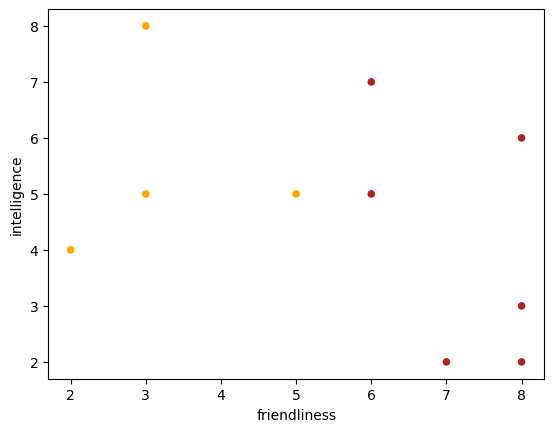

In [23]:
training.plot(kind = "scatter", x = "friendliness", y = "intelligence",c="color")
plt.show()

In [24]:
#we need euclidean distance --- let's do a quick example
train_ex = training[["friendliness","intelligence"]].iloc[0]
test_ex = testing[["friendliness","intelligence"]].iloc[0]
train_ex,test_ex


(friendliness    3
 intelligence    8
 Name: 0, dtype: int64,
 friendliness    8
 intelligence    3
 Name: 0, dtype: int64)

In [25]:
#what is the euclidean distance between One testing thing and one training thing
test=ssd.euclidean(train_ex,test_ex)
test

7.0710678118654755

In [26]:
#make a list of distances, from test +ex to every row in triaing
distances= []
for i in range(len(training)):
    train = training[["friendliness","intelligence"]].iloc[i]
    distance = ssd.euclidean(train,test_ex)
    distances.append((training["name"].iloc[i],training["label"].iloc[i],distance))
distances

[('Choux', 'cat', 7.0710678118654755),
 ('Garfield', 'cat', 6.082762530298219),
 ('Lion-o', 'cat', 3.605551275463989),
 ('Pink Pather', 'cat', 5.385164807134504),
 ('McGruff', 'dog', 2.8284271247461903),
 ('Scooby Doo', 'dog', 0.0),
 ('Odie', 'dog', 1.4142135623730951),
 ('Grizz', 'dog', 3.0),
 ('Carol', 'dog', 4.47213595499958),
 ('Clifford', 'dog', 1.0)]

In [27]:
#find k smallest distances

K = 3
distances.sort(key = lambda a :a[2])
distances[:K]



[('Scooby Doo', 'dog', 0.0),
 ('Clifford', 'dog', 1.0),
 ('Odie', 'dog', 1.4142135623730951)]

In [28]:
#final step of the K smallest distances, which claass do we belong to?


In [29]:
find_majority_class(["cat","dog"],distances[:K])

'dog'

In [30]:
all_dist = []
for i in range(len(testing)):
    test = testing[["friendliness","intelligence"]].iloc[i]
    curr_dist = []
    for j in range(len(training)):
        train = training[["friendliness","intelligence"]].iloc[j]
        dist = ssd.euclidean(test,train)
        curr_dist.append((training["name"].iloc[j],training["label"].iloc[j],dist))
    all_dist.append(curr_dist)

all_dist

[[('Choux', 'cat', 7.0710678118654755),
  ('Garfield', 'cat', 6.082762530298219),
  ('Lion-o', 'cat', 3.605551275463989),
  ('Pink Pather', 'cat', 5.385164807134504),
  ('McGruff', 'dog', 2.8284271247461903),
  ('Scooby Doo', 'dog', 0.0),
  ('Odie', 'dog', 1.4142135623730951),
  ('Grizz', 'dog', 3.0),
  ('Carol', 'dog', 4.47213595499958),
  ('Clifford', 'dog', 1.0)],
 [('Choux', 'cat', 1.0),
  ('Garfield', 'cat', 3.1622776601683795),
  ('Lion-o', 'cat', 2.8284271247461903),
  ('Pink Pather', 'cat', 2.0),
  ('McGruff', 'dog', 3.605551275463989),
  ('Scooby Doo', 'dog', 6.4031242374328485),
  ('Odie', 'dog', 6.4031242374328485),
  ('Grizz', 'dog', 5.0990195135927845),
  ('Carol', 'dog', 3.0),
  ('Clifford', 'dog', 7.0710678118654755)],
 [('Choux', 'cat', 8.48528137423857),
  ('Garfield', 'cat', 7.280109889280518),
  ('Lion-o', 'cat', 5.0),
  ('Pink Pather', 'cat', 6.708203932499369),
  ('McGruff', 'dog', 4.242640687119285),
  ('Scooby Doo', 'dog', 1.4142135623730951),
  ('Odie', 'dog', 2

In [31]:
for i in range(len(all_dist)):
    all_dist[i].sort(key = lambda a : a[2])
    all_dist[i] = all_dist[i][:K]
all_dist

[[('Scooby Doo', 'dog', 0.0),
  ('Clifford', 'dog', 1.0),
  ('Odie', 'dog', 1.4142135623730951)],
 [('Choux', 'cat', 1.0),
  ('Pink Pather', 'cat', 2.0),
  ('Lion-o', 'cat', 2.8284271247461903)],
 [('Clifford', 'dog', 1.0),
  ('Scooby Doo', 'dog', 1.4142135623730951),
  ('Odie', 'dog', 2.0)],
 [('Lion-o', 'cat', 1.0),
  ('McGruff', 'dog', 1.4142135623730951),
  ('Pink Pather', 'cat', 2.23606797749979)],
 [('McGruff', 'dog', 1.0),
  ('Carol', 'dog', 1.0),
  ('Lion-o', 'cat', 1.4142135623730951)],
 [('Carol', 'dog', 1.0),
  ('Lion-o', 'cat', 2.0),
  ('Choux', 'cat', 2.23606797749979)],
 [('Scooby Doo', 'dog', 1.0),
  ('Clifford', 'dog', 1.4142135623730951),
  ('Odie', 'dog', 2.23606797749979)],
 [('Choux', 'cat', 1.0),
  ('Pink Pather', 'cat', 2.0),
  ('Lion-o', 'cat', 2.8284271247461903)],
 [('Choux', 'cat', 1.0),
  ('Pink Pather', 'cat', 2.0),
  ('Lion-o', 'cat', 2.8284271247461903)]]

In [32]:
predicitions = []
for dist in all_dist:
    curr_class = find_majority_class(["cat","dog"],dist)
    predicitions.append(curr_class)
predicitions

['dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat']

In [33]:
testing["predicted"] = predicitions
testing

,name,friendliness,intelligence,label,predicted
0,Sven,8,3,dog,dog
1,Asteroid,3,7,cat,cat
2,Zeke,9,2,dog,dog
3,Melvin,5,4,dog,cat
4,Remy,6,6,dog,dog
5,Lady,5,7,dog,cat
6,Cam,9,3,dog,dog
7,Tito's,3,7,cat,cat
8,Bailey,3,7,cat,cat


In [35]:
report = metrics.classification_report(testing["label"],testing["predicted"])
print(report)

              precision    recall  f1-score   support

         cat       0.60      1.00      0.75         3
         dog       1.00      0.67      0.80         6

    accuracy                           0.78         9
   macro avg       0.80      0.83      0.77         9
weighted avg       0.87      0.78      0.78         9



In [36]:
confusion = metrics.confusion_matrix(testing["label"],testing["predicted"])
print(confusion)

[[3 0]
 [2 4]]


<Axes: >

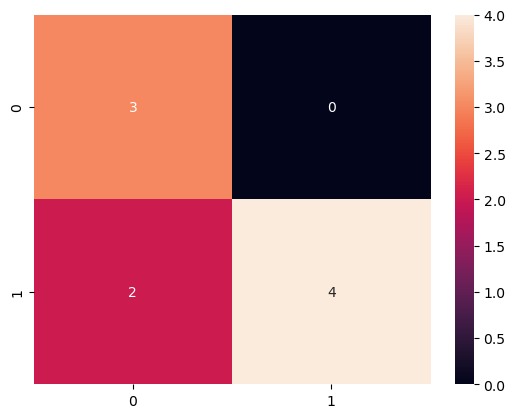

In [37]:
sns.heatmap(confusion,annot=True)